# Assignment A6: Segmentation
### Snakes and Level Sets

**Cade Parkison**

CS 6640

Fall 2018

---

## Problem 1: Active Contours

Develop a function as described by the header below that uses active contours, morphology,
etc., in order to get the best segmentation of moving objects possible. Example
input data is provided in the test data sub-directory in the class page. Explore methods to
improve the segmentation, and report on that.


In [120]:
%%file CS6640_display_results.m
function M2 = CS6640_display_results(im_seg, vidObj)
% CS6640_display_results - Displays the tracked objects overlaid on video
% On input:
%     vidObj (video object obtained by VideoReader): input video
%     im_seg (MxNxF binary array): improved segmentation provided as
%     sequence of F images
% On output:
%     M2 (Matlab movie): output movie of combo images
% Call:
%     M2 = CS6640_display_results(im_seg, vidObj)
% Author:
%     Cade Parkison
%     Fall 2018
%     UU
%

k = 1;

vidObj.CurrentTime = 0;
while hasFrame(vidObj)
    vidFrame = double(rgb2gray(readFrame(vidObj)));

    bw = ~im_seg(:,:,k);
    
    % Capture video
    figure(1);
    combo(mat2gray(vidFrame), bw);
    M2(k) = getframe(gca);
    %pause(p);

    k = k+1;
end

end

Created file 'C:\Users\cadep\School\CS_6640\A6\CS6640_display_results.m'.


In [159]:
%%file CS6640_ac.m
function im_seg = CS6640_ac(M,vidObj)
% CS6640_ac - use active contours to improve segmentation
% On input:
%     M (Matlab movie struct): segmentation movie (binary)
%     vidObj (video struct): created by readVideo
% On output:
%     im_seg (MxNxF binary array): improved segmentation provided as
%     sequence of F images
% Call:
%     vidObj = VideoReader(’../../../A4/video3.avi’);
%     ims = CS6640_ac(M,vidObj);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

k = 1;
[m,n, r] = size(M(1).cdata);
n_frames = length(M);

im_seg = zeros(m,n,n_frames);

vidObj.CurrentTime = 0;
while hasFrame(vidObj)
    im = double(rgb2gray(readFrame(vidObj)));
    mask = im2bw(M(k).cdata);
    
    % Get segmented region with largest size
    [L,n_regions] = bwlabel(mask);
    region_size = zeros(n_regions,1);
    for r=1:n_regions
        region_size(r) =  length(find(L==r));
    end
    [max_, I] = max(region_size);
    mask = L==I;
    
    % Active Contours
    bw = activecontour(im, mask, 100, 'Chan-Vese');
    
    im_seg(:,:,k) = bw;

    k = k+1;
end

end

Created file 'C:\Users\cadep\School\CS_6640\A6\CS6640_ac.m'.


### Testing 

**TODO:**

- use matlabs activeContours()

In [61]:
%plot inline

In [58]:
clear all;close all;clc

load('M1.mat');
load('M2.mat');
load('M3.mat');

vidObj = VideoReader('video3.avi');
vidObj2 = VideoReader('video3.avi');
M = M3;

In [123]:
vidObj3 = VideoReader('video3.avi');

In [34]:
implay(M2)

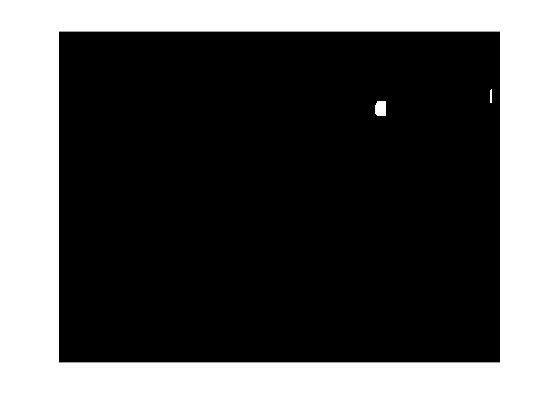

In [111]:
M2_ = CS6640_MM(vidObj2);

**Results 1:**

iter=150

In [112]:
ims2 = CS6640_ac(M2_, vidObj2);

> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)



In [121]:
size(ims2)


ans =

   480   640   184




In [113]:
implay(ims2)

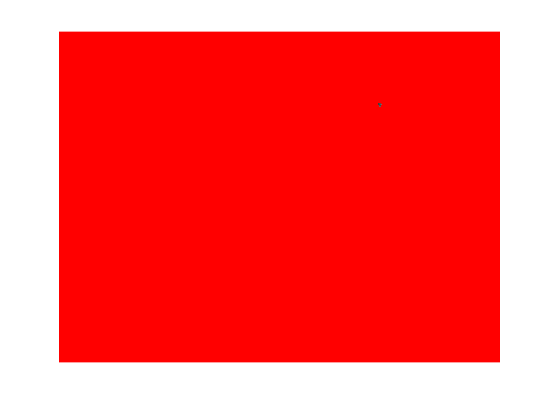

In [124]:
M2_results = CS6640_display_results(ims2, vidObj3); 

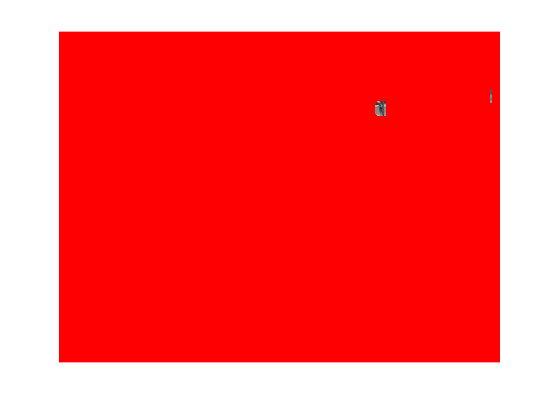

In [130]:
M2_results_o = CS6640_display(M2_, vidObj3); 

In [132]:
%plot native

In [128]:
im = rgb2gray(read(vidObj,51));

In [141]:
frame1 = M2_results(15).cdata;
imshow(frame1)

In [140]:
frame1_o = M2_results_o(15).cdata;
imshow(frame1_o)

**Results 2:**

iter=100

In [152]:
ims2 = CS6640_ac(M2_, vidObj2);

> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)
> In images.activecontour.internal.ActiveContourEvolver/moveActiveContour
  In activecontour (line 296)
  In CS6640_ac (line 39)



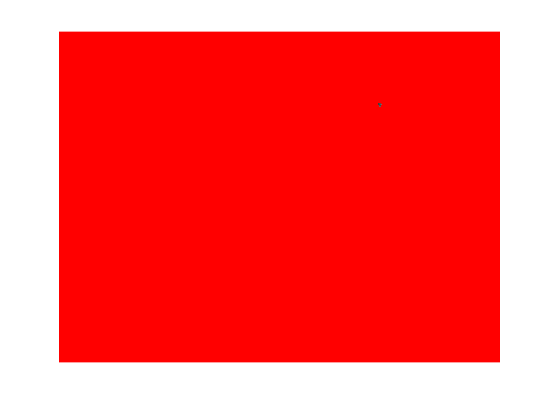

In [153]:
M2_results2 = CS6640_display_results(ims2, vidObj3);

In [162]:
%plot native

In [157]:
frame1 = M2_results(51).cdata;
imshow(frame1)

**Results 3:**

iter=100, method=Chan-Vese

In [160]:
ims3 = CS6640_ac(M2_, vidObj2);

In [161]:
M3_results = CS6640_display_results(ims3, vidObj3);

In [164]:
frame1 = M3_results(51).cdata;
imshow(frame1)

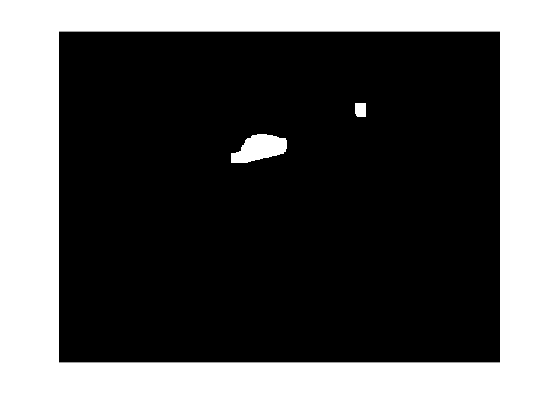

In [127]:
mask2 = im2bw(M2_(51).cdata);
combo()

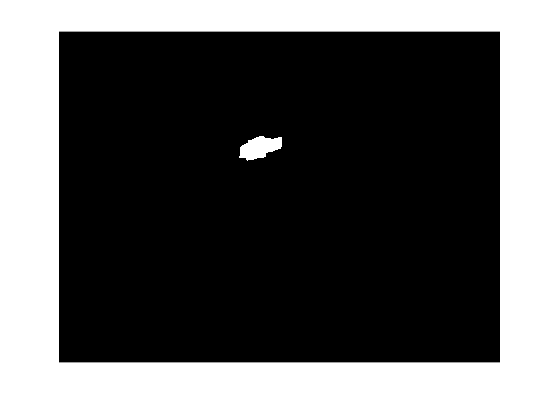

In [115]:
im1 = ims2(:,:,51);
imshow(im1)

In [59]:
frame = 51;

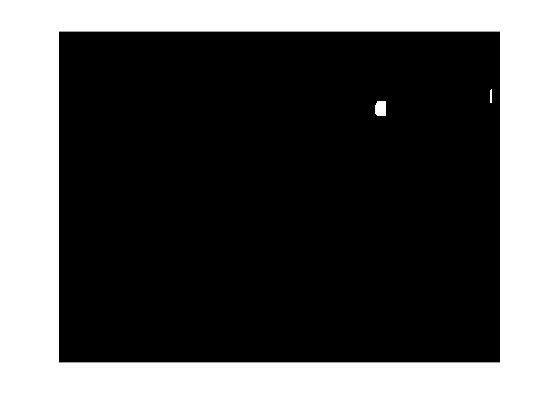

In [117]:
M_ = CS6640_MM(vidObj2);


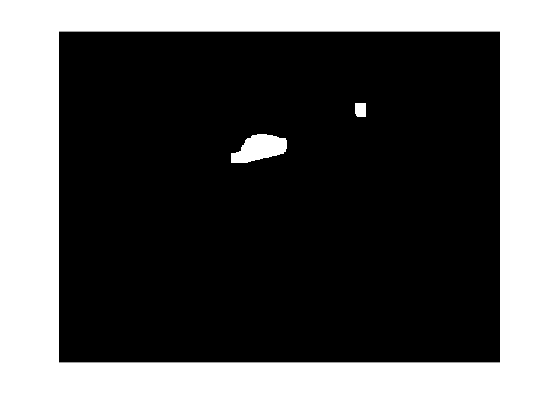

In [118]:
mask2 = im2bw(M_(frame).cdata);
imshow(mask2)

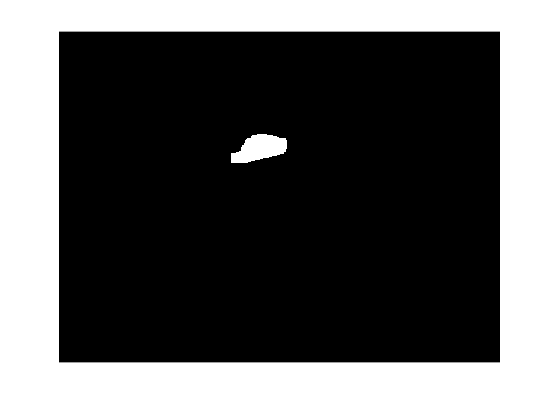

In [119]:
[L,n] = bwlabel(mask2);
region_size = zeros(n,1);
for r=1:n
    region_size(r) =  length(find(L==r));
end
[max_, I] = max(region_size);
mask3 = L==I;
imshow(mask3)

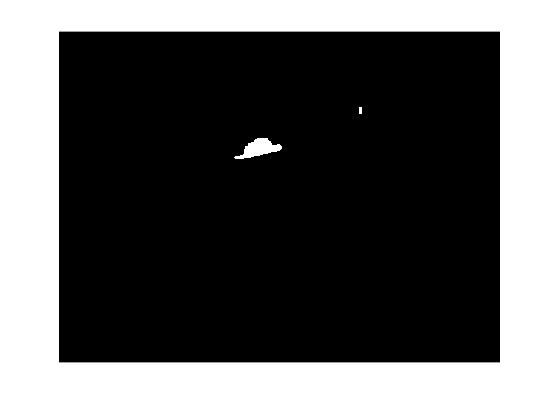

In [62]:
mask1 = im2bw(M3(frame).cdata);
imshow(mask1)

In [98]:
[L,n] = bwlabel(mask1);
region_size = zeros(n,1);
for r=1:n
    region_size(r) =  length(find(L==r));
end
[max_, I] = max(region_size);
mask3 = L==I;
imshow(mask3)

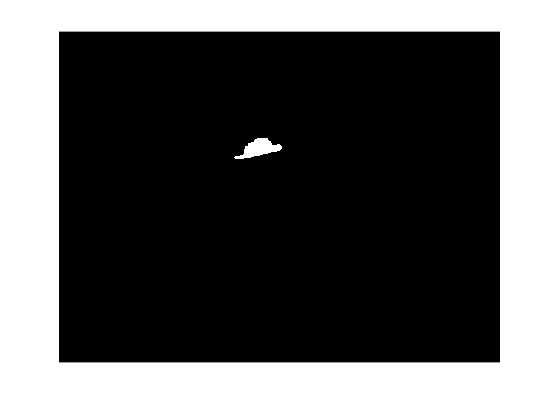

In [102]:
mask3 = L==I;
imshow(mask3)

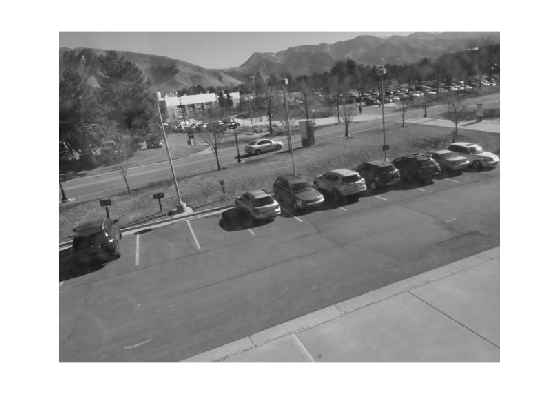

In [100]:
im = rgb2gray(read(vidObj,frame));
imshow(im)

In [143]:
%plot inline

In [158]:
bw1 = activecontour(im, mask1, 150, 'Chan-Vese');
imshow(bw1)

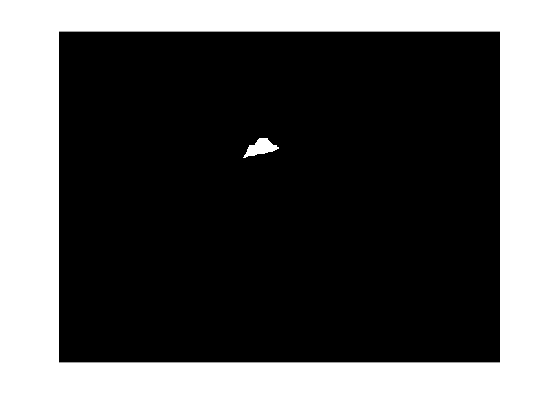

In [149]:
bw1 = activecontour(im, mask1, 100, 'edge');
imshow(bw1)

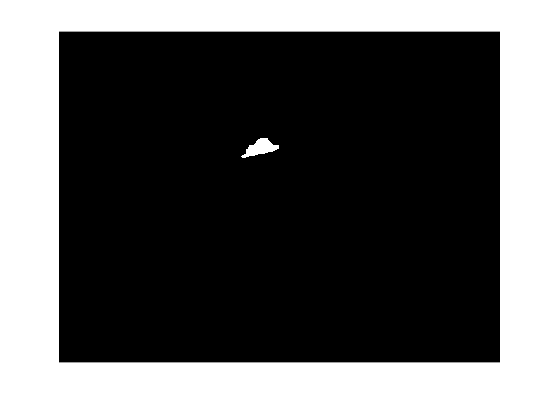

In [107]:
bw2 = activecontour(im, mask3, 50, 'edge');
imshow(bw2)

In [53]:
size(bw)


ans =

   480   640




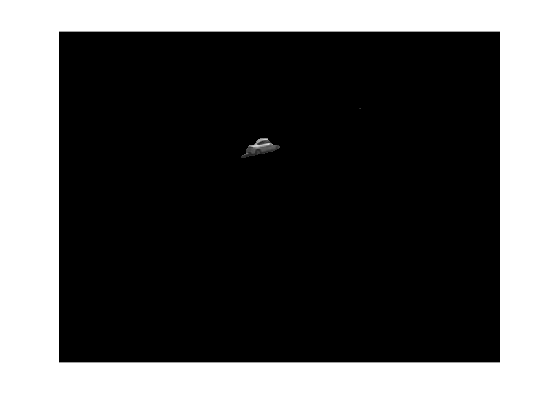

In [108]:
maskedRgbImage = bsxfun(@times, im, cast(bw1, 'like', im));
imshow(maskedRgbImage)

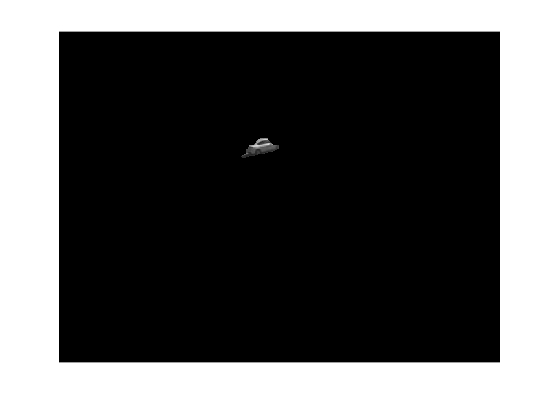

In [109]:
maskedRgbImage = bsxfun(@times, im, cast(bw2, 'like', im));
imshow(maskedRgbImage)

---
## Problem 2: Level Sets

Write a level set function as described below, and test it out as a means of providing a
better segmentation of a moving object. E.g., given a segment with a moving object, start
the level set operator in different (i.e., by gray level) parts of the segment.

In [6]:
%%file CS6640_level_set.m
function [phi,tr] = CS6640_level_set(im,max_iter,del_t,r0,c0)
% CS6640_level_set - level set of image
% On input:
%     im (MxN array): gray level or binary image
%     max_iter (int): maximum number of iterations
%     del_t (float): time step
%     r0 (int): row center of circular level set function
%     c0 (int): column center of circular level set function
% On output:
%     phi (MxN array): final phi array
%     tr (qx1 vector): sum(sum(abs(phi_(n+1) - phi_n)))
% Call:
%     [phi,tr] = CS6640_level_set(im,300,0.1,25,25);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

% boolean to enable display of each iteration
DISPLAY = 1;

radius = 2;

[M,N] = size(im);

[Gx, Gy] = gradient(im);
Gmag = sqrt(Gx.^2+Gy.^2);
%[Gmag,Gdir] = imgradient(im);

F = exp(-Gmag);

p = @(r,c)sqrt((r-r0)^2 + (c-c0)^2) - radius;
phi_0 = zeros([M,N]);

for r=1:M
    for c=1:N
        phi_0(r,c) = p(r,c);
    end 
end

phi = phi_0;
phi_new = phi;

tr = zeros(max_iter,1);

for i=1:max_iter
    
    for r=2:M-1
        for c=2:N-1

            Dxp = phi(r+1,c) - phi(r,c);
            Dxn = phi(r,c) - phi(r-1,c);
            Dyp = phi(r,c+1) - phi(r,c);
            Dyn = phi(r,c) - phi(r,c-1);
            
            Gphi_p = sqrt(max(Dxn,0)^2 + min(Dxp,0)^2 + max(Dyn,0)^2 + min(Dyp,0)^2);
            Gphi_n = sqrt(max(Dxp,0)^2 + min(Dxn,0)^2 + max(Dyp,0)^2 + min(Dyn,0)^2);
        
            phi_new(r,c) = phi(r,c) - del_t*(max(F(r,c),0)*Gphi_p + min(F(r,c),0)*Gphi_n);

        end
    end
    
    tr(i) = sum(sum(abs(phi_new - phi)));
    phi=phi_new;
    
    % Display iterations as movie
    if true(DISPLAY)
        bw = zeros([M,N]);
        indexes = find(phi<=0);
        for j=1:length(indexes)
            ind = indexes(j);
            bw(ind) = 1;
        end
        bw = ~bw;
        
        combo(mat2gray(im), bw);

    end
    
end

end

Created file 'C:\Users\cadep\School\CS_6640\A6\CS6640_level_set.m'.


### Testing

In [4]:
%plot native

In [95]:
%plot inline

In [15]:
clear all;close all;clc

In [16]:
vidObj = VideoReader('video3.avi');

In [17]:
im_rgb = read(vidObj, 51);
im = double(rgb2gray(im_rgb));

imshow(im,[]);

In [ ]:
clf;
imshow(im,[]);
hold on;
plot(500,425, 'r+', 'MarkerSize', 30);
hold off;

Parking Lot:

In [33]:
clf;
imshow(im,[]);
hold on;
plot(372,340, 'r+', 'MarkerSize', 30);
hold off;

In [32]:
[phi,tr] = CS6640_level_set(im,1000,0.8,340,372);

In [34]:
bw = zeros([480,640]);
indexes = find(phi<=0);
for j=1:length(indexes)
    ind = indexes(j);
    bw(ind) = 1;
end
        
combo(mat2gray(im), bw);

In [52]:
plot(tr)

Bottom Right Sidewalk:

In [4]:
%plot native

In [11]:
[phi,tr] = CS6640_level_set(im,1000,0.8,425,500);

In [13]:
plot(tr);
xlabel('Iterations');
ylabel('Trace');

Car Window:

In [21]:
clf;
imshow(im,[]);
hold on;
plot(307,169, 'r+', 'MarkerSize', 20);
hold off;

In [11]:
[phi,tr] = CS6640_level_set(im,1000,0.8,169,307);

In [12]:
bw = zeros([480,640]);
indexes = find(phi<=0);
for j=1:length(indexes)
    ind = indexes(j);
    bw(ind) = 1;
end
        
combo(mat2gray(im), bw);

Car 2:

In [18]:
clf;
imshow(im,[]);
hold on;
plot(365,236, 'r+', 'MarkerSize', 30);
hold off;

In [25]:
[phi,tr] = CS6640_level_set(im,1000,0.8,235,365);

In [31]:
bw = zeros([480,640]);
indexes = find(phi<=0);
for j=1:length(indexes)
    ind = indexes(j);
    bw(ind) = 1;
end

        
combo(mat2gray(im), bw);

In [ ]:
Grass:

In [47]:
[phi,tr] = CS6640_level_set(im,1000,0.8,175,399);


  File C:\Program Files\MATLAB\R2017b\toolbox\matlab\images\imshow.m, line 343, in imshow

  File C:\Users\cadep\School\CS_6640\A6\combo.m, line 37, in combo

  File C:\Users\cadep\School\CS_6640\A6\CS6640_level_set.m, line 77, in CS6640_level_set
Invalid or deleted object.



In [14]:
max(phi(:))


ans =

  652.8107




In [23]:
r0 = 425;
c0 = 500;
radius = 2;


[M,N] = size(im);

[Gx, Gy] = gradient(im);
Gmag = sqrt(Gx.^2+Gy.^2);

F = exp(-Gmag);

p = @(r,c)sqrt((r-r0)^2 + (c-c0)^2) - radius;
phi_0 = zeros([M,N]);

for r=1:M
    for c=1:N
        phi_0(r,c) = p(r,c);
    end 
end

In [158]:
phi(100-1,2-1)


ans =

  581.5898




In [155]:
max(phi_0(:))


ans =

  652.8107




In [128]:
phi_0(425,498)


ans =

     0




In [32]:
indexes = find(phi_0<=0)


indexes =

      238985
      239464
      239465
      239466
      239943
      239944
      239945
      239946
      239947
      240424
      240425
      240426
      240905




In [ ]:
for k=1:length(indexes)
    [i,j] = ind2sub([M,N], indexes(j)
end

In [131]:
[i,j] = ind2sub([M,N], 238985)


i =

   425


j =

   498


